# Principal Component Analysis Assignment

In [91]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Import the [PitchFX data set](https://docs.google.com/spreadsheets/d/1pmBtSw7v_tU_dIX1-4E8_Q7wC43fDs6LGDQzN49-ffk/export?format=csv).

In [92]:
data = pd.read_csv('https://docs.google.com/spreadsheets/d/1pmBtSw7v_tU_dIX1-4E8_Q7wC43fDs6LGDQzN49-ffk/export?format=csv')

### Keep only the pitch type and the numeric columns (exluding ID fields).

* Drop any remaining records that contain null values.
* Consider `pitchType` as `y`/target and the remaining columns to be `X`/features.

In [93]:
data[data.columns[data.dtypes == int]]

,inning,balls,strikes,outs,batterId,pitcherId,timesFaced,catcherId,umpireId
0,1,0,0,0,452655,503449,1,518960,427192
1,1,0,1,0,452655,503449,1,518960,427192
2,1,0,2,0,452655,503449,1,518960,427192
3,1,0,0,1,605412,503449,1,518960,427192
4,1,0,1,1,605412,503449,1,518960,427192
...,...,...,...,...,...,...,...,...,...
79926,9,1,1,2,475174,457732,1,542908,427315
79927,9,1,2,2,475174,457732,1,542908,427315
79928,9,2,2,2,475174,457732,1,542908,427315
79929,9,2,2,2,475174,457732,1,542908,427315


In [94]:
data.pitchType.value_counts()
lb_make = LabelEncoder()
data['typeid'] = lb_make.fit_transform(data["pitchType"])
data[["pitchType", "typeid"]].head(11)

,pitchType,typeid
0,FF,4
1,FT,6
2,FF,4
3,FT,6
4,FF,4
5,FT,6
6,FF,4
7,FT,6
8,FF,4
9,FT,6


In [95]:
data = data.dropna()
y = data['typeid']
X = data[data.columns[((data.dtypes == float) | (data.dtypes == int))]].drop(columns=['pitcherId', 'catcherId', 'batterId', 'umpireId', 'typeid'])
X = X.dropna()
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13438 entries, 2 to 79930
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inning              13438 non-null  int64  
 1   balls               13438 non-null  int64  
 2   strikes             13438 non-null  int64  
 3   outs                13438 non-null  int64  
 4   timesFaced          13438 non-null  int64  
 5   probCalledStrike    13438 non-null  float64
 6   releaseVelocity     13438 non-null  float64
 7   spinRate            13438 non-null  float64
 8   spinDir             13438 non-null  float64
 9   locationHoriz       13438 non-null  float64
 10  locationVert        13438 non-null  float64
 11  movementHoriz       13438 non-null  float64
 12  movementVert        13438 non-null  float64
 13  battedBallAngle     13438 non-null  float64
 14  battedBallDistance  13438 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 1.6 MB


### Reduce the dimensionality of the data using PCA to two components.

Don't forget to scale.

In [96]:
scale = StandardScaler()
X_std = scale.fit_transform(X)
pca = PCA(n_components=2)
two = pca.fit_transform(X_std)

### Compute the explained variance for new data set.

In [97]:
pca.get_covariance()

array([[ 8.45656663e-01,  5.35196554e-04, -2.74174518e-03,
         1.72078498e-04, -1.73728509e-03,  5.34619944e-03,
         8.07772007e-03,  4.56599861e-03, -1.12369668e-03,
         2.70469623e-03,  6.87020848e-03,  1.66344994e-03,
         7.86998543e-03,  1.68418332e-03,  4.28826850e-03],
       [ 5.35196554e-04,  8.47667108e-01, -8.87742294e-03,
        -1.52200658e-04, -4.99613980e-03,  1.05754046e-02,
         3.03645439e-02,  2.88168494e-04,  2.33729757e-02,
        -7.59812863e-03,  1.61666910e-02, -2.13151760e-02,
         2.93368221e-02,  2.70329666e-03,  7.83752853e-03],
       [-2.74174518e-03, -8.87742294e-03,  8.82018581e-01,
        -2.05927310e-04,  2.13756671e-02, -5.16034373e-02,
        -1.20462577e-01, -1.82445825e-02, -6.47594247e-02,
         1.21405597e-02, -7.39246323e-02,  5.66249240e-02,
        -1.16635525e-01, -1.44007011e-02, -3.94861942e-02],
       [ 1.72078498e-04, -1.52200658e-04, -2.05927310e-04,
         8.45599234e-01, -3.38306444e-04,  2.62687453

### Generate a scatter plot that visualizes how the component values are distributed.

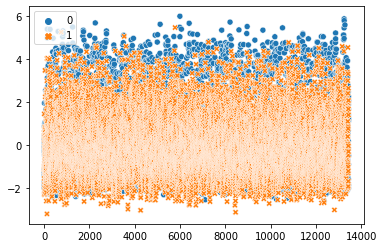

In [98]:
sns.scatterplot(data=two)

### Create a line plot that shows the explained variance by number of components.

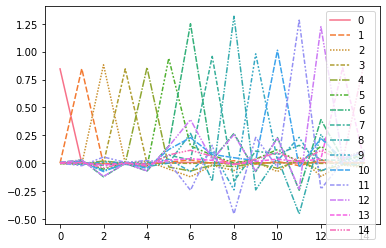

In [99]:
sns.lineplot(data=pca.get_covariance())

### Iteratively train and score a Random Forest Classifier (to predict `pitchType`).

* In each iteration:
    * Increase the number of principal components (start with `2`)
    * Store the number of components and model score

In [100]:
model = RandomForestClassifier(max_depth=4, random_state=1)

In [101]:
results = pd.DataFrame(columns=['comps', 'score'])
#Split the data.
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2)

total = range(2, 10)
for n in total:
  pca = PCA(n_components=n)
  comp = pca.fit_transform(X_train)
  comp_test = pca.transform(X_test)
  model.fit(comp, y_train)
  y_pred = model.predict(comp_test)
  #Update the results table
  results = results.append({'comps': n, 'score' : model.score(comp_test, y_pred)}, ignore_index=True)

results

,comps,score
0,2.0,1.0
1,3.0,1.0
2,4.0,1.0
3,5.0,1.0
4,6.0,1.0
5,7.0,1.0
6,8.0,1.0
7,9.0,1.0


### Create a line plot that shows the training scores across the different numbers of principal components.

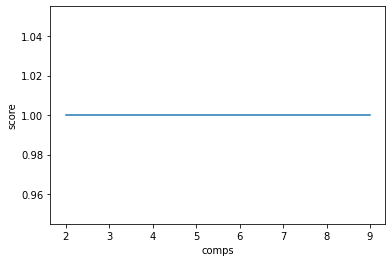

In [102]:
sns.lineplot(data=results, x='comps', y='score')

### Based on the analysis you conducted, what is the optimal number of principal components?

Two would be the optimal number of principle components in this circumstance. 

It looks like I'm overfitting the model. That said; if we're talking about process reduction and a complete reduction of the variables down to two simple components is the requirement, then I go to how long it takes to process the results. 

Two components, that is; fewer iterations, won't take as long. I'll go with two components. 